In [9]:
BASE_PATH = '../../models/evaluation'


In [10]:
algorithms = ['Attention', 'CnnPolicy', 'PCA', 'PPO', 'Sparse_autoencoder', 'Sparse_autoencoder_temporal_spatial']


In [12]:
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


# Create subplots: 1 column, 2 rows (rewards and lengths)
fig = make_subplots(
    rows=2, 
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    subplot_titles=("Reward Comparison", "Episode Length Comparison")
)

# Create color palette
colors = px.colors.qualitative.Plotly * 2  # Extend color palette

# Read and plot data for each algorithm
for i, algo in enumerate(algorithms):
    file_path = os.path.join(BASE_PATH, f'evaluation_results_{algo}.csv')
    df = pd.read_csv(file_path)
    df['timestep'] = df.index
    # Add reward trace to top subplot
    fig.add_trace(
        go.Scatter(
            x=df['timestep'], 
            y=df['rewards'],
            name=algo,
            mode='lines+markers',
            line=dict(width=2, color=colors[i]),
            marker=dict(size=6),
            legendgroup=algo,
            showlegend=True if i==0 else False  # Only show legend for first trace
        ),
        row=1, col=1
    )
    
    # Add episode length trace to bottom subplot
    fig.add_trace(
        go.Scatter(
            x=df['timestep'], 
            y=df['episode_lenghts'],
            name=algo,
            mode='lines+markers',
            line=dict(width=2, color=colors[i], dash='dot'),
            marker=dict(size=6, symbol='square'),
            legendgroup=algo,
            showlegend=False  # Don't duplicate legend
        ),
        row=2, col=1
    )

# Update layout
fig.update_layout(
    title='Algorithm Performance Comparison',
    height=800,
    template='plotly_white',
    hovermode='x unified',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Update axis labels
fig.update_xaxes(title_text="Timesteps", row=2, col=1)
fig.update_yaxes(title_text="Reward", row=1, col=1)
fig.update_yaxes(title_text="Episode Length", row=2, col=1)

# Add range slider for zooming
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type="linear"
    )
)

fig.show()

<Figure size 1400x1000 with 0 Axes>

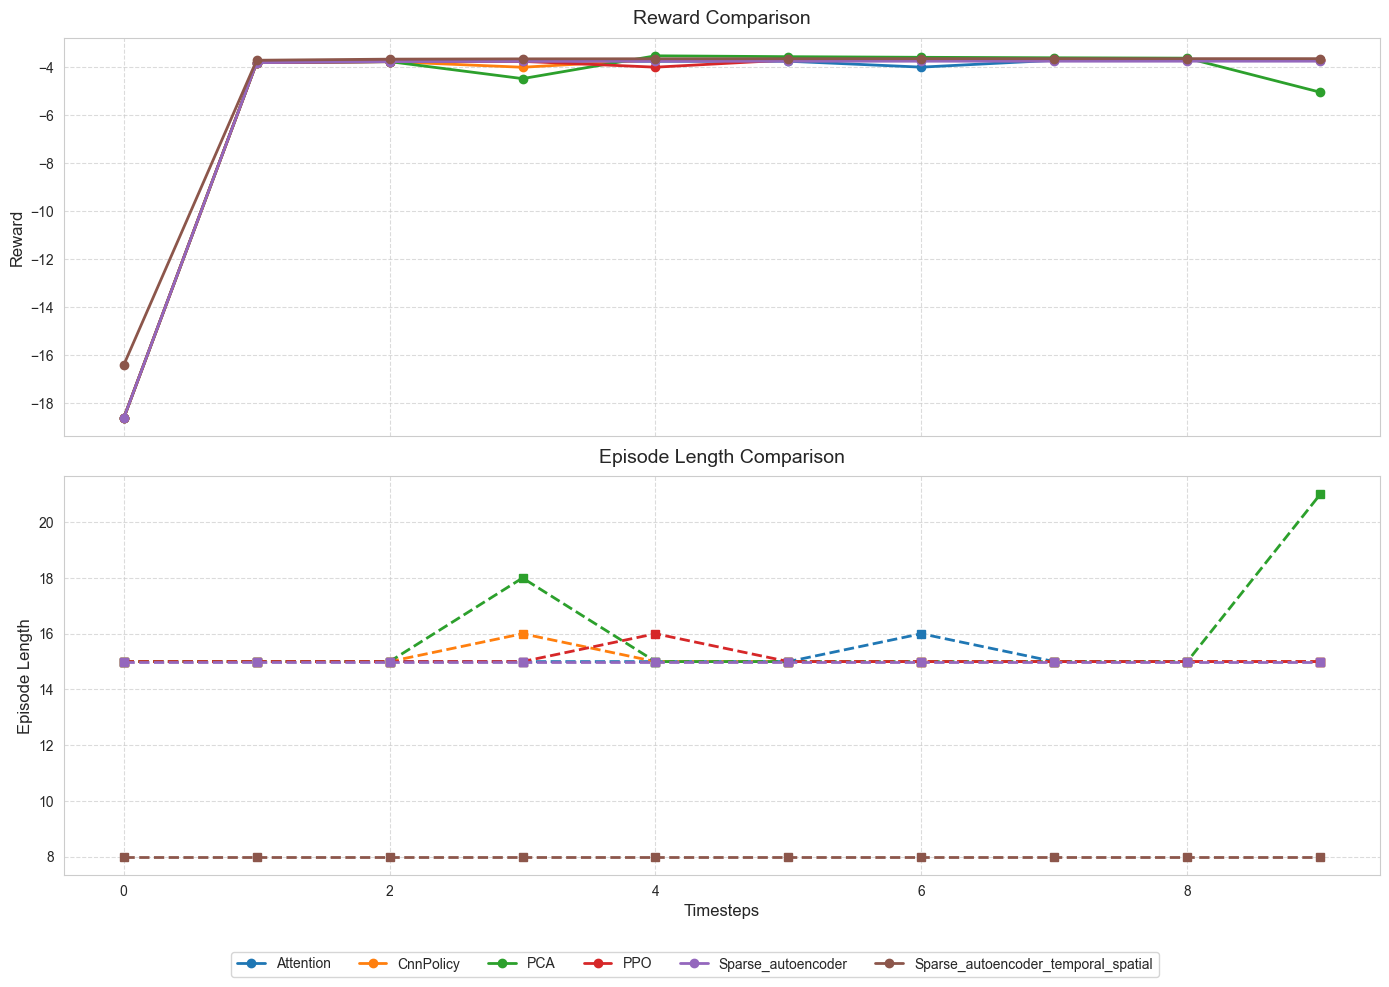

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot each algorithm
for i, algo in enumerate(algorithms):
    file_path = os.path.join(BASE_PATH, f'evaluation_results_{algo}.csv')
    df = pd.read_csv(file_path)
    df['timestep'] = df.index  # Use index as timestep
    # Plot rewards
    ax1.plot(
        df['timestep'], 
        df['rewards'], 
        label=algo,
        linewidth=2,
        marker='o',
        markersize=6
    )
    
    # Plot lengths
    ax2.plot(
        df['timestep'], 
        df['episode_lenghts'], 
        label=algo,
        linewidth=2,
        linestyle='--',
        marker='s',
        markersize=6
    )

# Configure top plot (rewards)
ax1.set_title('Reward Comparison', fontsize=14, pad=10)
ax1.set_ylabel('Reward', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', labelsize=10)

# Configure bottom plot (lengths)
ax2.set_title('Episode Length Comparison', fontsize=14, pad=10)
ax2.set_xlabel('Timesteps', fontsize=12)
ax2.set_ylabel('Episode Length', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='both', labelsize=10)

# Add combined legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 0.05), 
    ncol=len(algorithms),
    fontsize=10,
    frameon=True
)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.12)  # Make room for legend

# Save and show
plt.savefig('algorithm_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

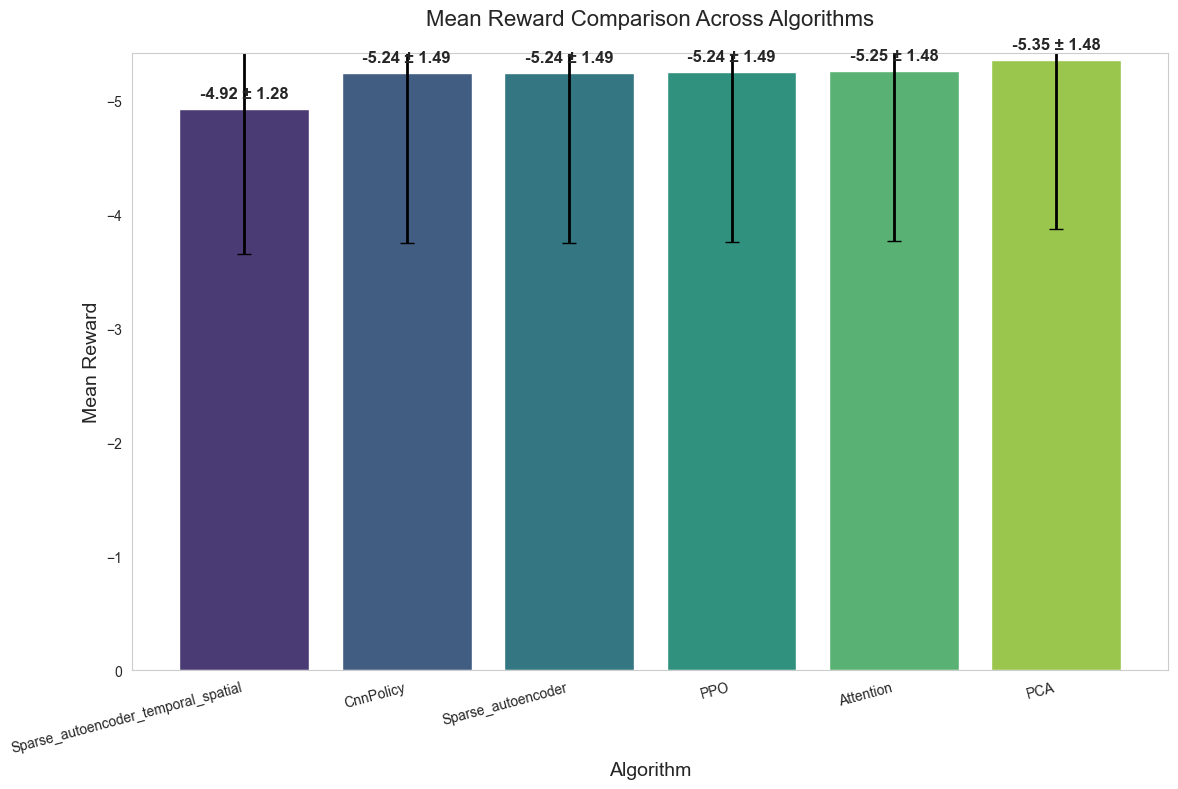

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Collect data from all runs
all_data = []

for algo in algorithms:
    file_path = os.path.join(BASE_PATH, f'evaluation_results_{algo}.csv')
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    
    df = pd.read_csv(file_path)
    df['timestep'] = df.index  # Use index as timestep
    # Calculate mean reward for this algorithm
    mean_reward = df['rewards'].mean()
    
    # Calculate standard error (for error bars)
    std_error = df['rewards'].std() / np.sqrt(len(df))
    
    # Store results
    all_data.append({
        'Algorithm': algo,
        'Mean Reward': mean_reward,
        'Standard Error': std_error
    })

# Convert to DataFrame
results_df = pd.DataFrame(all_data)

# Sort by performance (optional)
results_df = results_df.sort_values('Mean Reward', ascending=False)

# Create plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Algorithm', 
    y='Mean Reward', 
    data=results_df,
    palette='viridis',
    order=results_df['Algorithm']  # Maintain sorted order
)

# Add error bars
ax.errorbar(
    x=range(len(results_df)),
    y=results_df['Mean Reward'],
    yerr=results_df['Standard Error'],
    fmt='none',
    ecolor='black',
    capsize=5,
    elinewidth=2
)

# Add value labels on top of bars
for i, row in enumerate(results_df.itertuples()):
    ax.text(
        i, 
        row._2 + 0.02 * results_df['Mean Reward'].max(),  # Position above bar
        f'{row._2:.2f} Â± {row._3:.2f}', 
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# Customize plot
plt.title('Mean Reward Comparison Across Algorithms', fontsize=16, pad=20)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Mean Reward', fontsize=14)
plt.xticks(rotation=15, ha='right')  # Rotate algorithm names slightly
plt.ylim(0, 1.1 * results_df['Mean Reward'].max())  # Add space for labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Save and show
plt.savefig('mean_reward_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Training rewards history

In [5]:
BASE_PATH = '../../models/14_07/history'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:


def preprocess_history_file(path):
    
    df = pd.read_csv(path)
    #df['timestep'] = df.index  # Use index as timestep

    # Initialize variables
    current_offset = 0
    prev = 0
    global_steps = []

    # Iterate through each row to compute global timesteps
    for index, row in df.iterrows():
        current_ts = row['timestep']  # Replace 'timestep' with your actual column name
        if current_ts <= prev:
            current_offset += prev
        global_ts = current_ts + current_offset
        global_steps.append(global_ts)
        prev = current_ts

    # Add global timesteps as a new column and save
    df['timestep'] = global_steps
    return df

def plot_history(algorithms):
        
    # Create plot figure
    plt.figure(figsize=(12, 8))

    # Process each algorithm's data
    for algo in algorithms:
        path = os.path.join(BASE_PATH, f'{algo}_MlpPolicy_training_history.csv')
        df = preprocess_history_file(path)
        #df = df.iloc[::10, :]
        
        
        # Plot rewards
        sns.lineplot(
            data=df,
            x='timestep',
            y='reward',  # Change to your reward column name if different
            label=algo.upper(),
            alpha=0.8
        )

    # Add plot decorations
    plt.title("Training Rewards Comparison", fontsize=16)
    plt.xlabel("Global Timestep", fontsize=12)
    plt.ylabel("Mean episode reward", fontsize=12)
    plt.legend(title="Algorithms", fontsize=10, title_fontsize=11)
    plt.tight_layout()

    # Save and show plot
    plt.savefig("training_rewards_comparison.png", dpi=300)
    plt.show()
def plot_history_plotly(algorithms):
    import plotly.express as px
    combined_df = pd.DataFrame()

    for algo in algorithms:
        path = os.path.join(BASE_PATH, f'{algo}_MlpPolicy_training_history.csv')
        df = preprocess_history_file(path)
        #df = df.iloc[::10, :]  # Downsample to every 10th point
        df['Algorithm'] = algo.upper()  # Add algorithm name
        combined_df = pd.concat([combined_df, df])

    # Create plot
    fig = px.line(
        combined_df,
        x='timestep',
        y='reward',
        color='Algorithm',
        labels={'timestep': 'Global Timestep', 'reward': 'Mean Episode Reward'},
        title='Training Rewards Comparison'
    )

    # Show plot
    fig.show()

In [24]:
algorithms = ['recurrentattention','Attention', 'CnnPolicy', 'PCA', 'PPO', 'Sparse_autoencoder', 'Sparse_autoencoder_temporal_spatial']
path = os.path.join(BASE_PATH,
                    'recurrent_ppo_attention',
                 f'{algorithms[0]}_MlpPolicy_training_history.csv')
df = preprocess_history_file(path)

## PPO MlpPolicy/MlpPolicy+Attention/MlpPolicy+Attention detached comparison

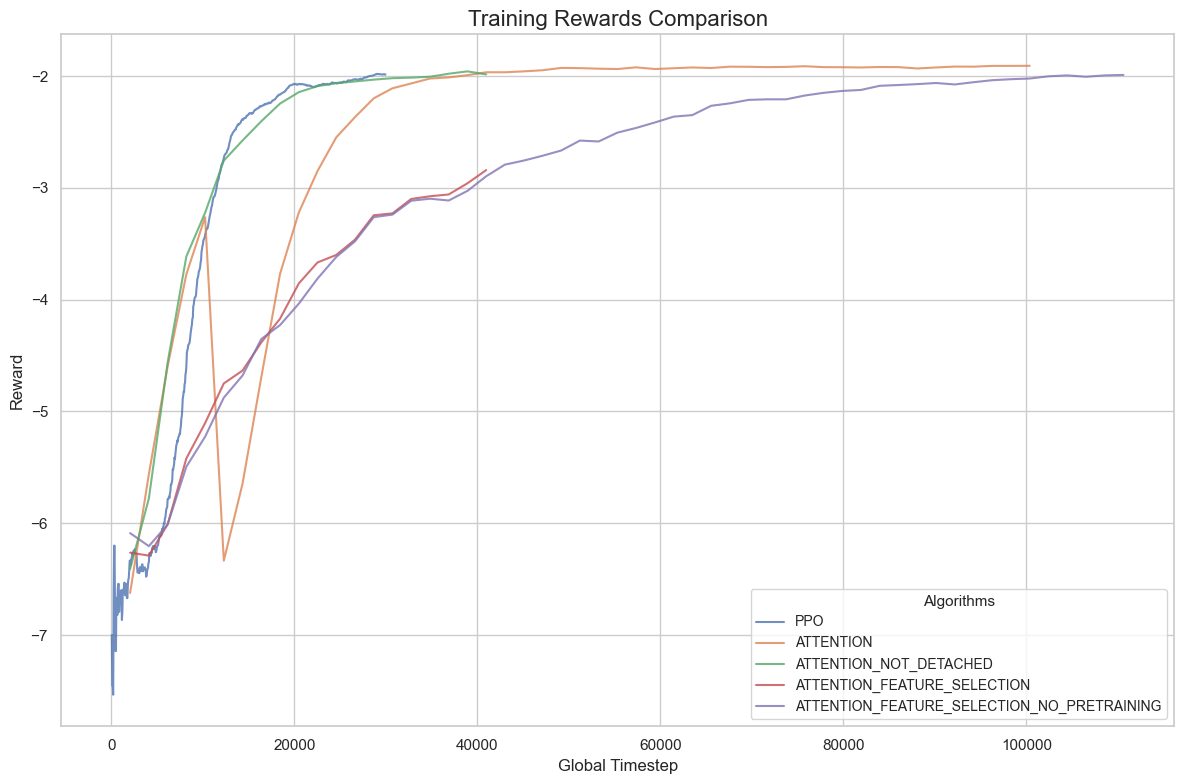

In [29]:
algorithms = ["ppo", "attention", "attention_not_detached", "attention_feature_selection", "attention_feature_selection_no_pretraining"]
plot_history(algorithms)

In [30]:
plot_history_plotly(algorithms)

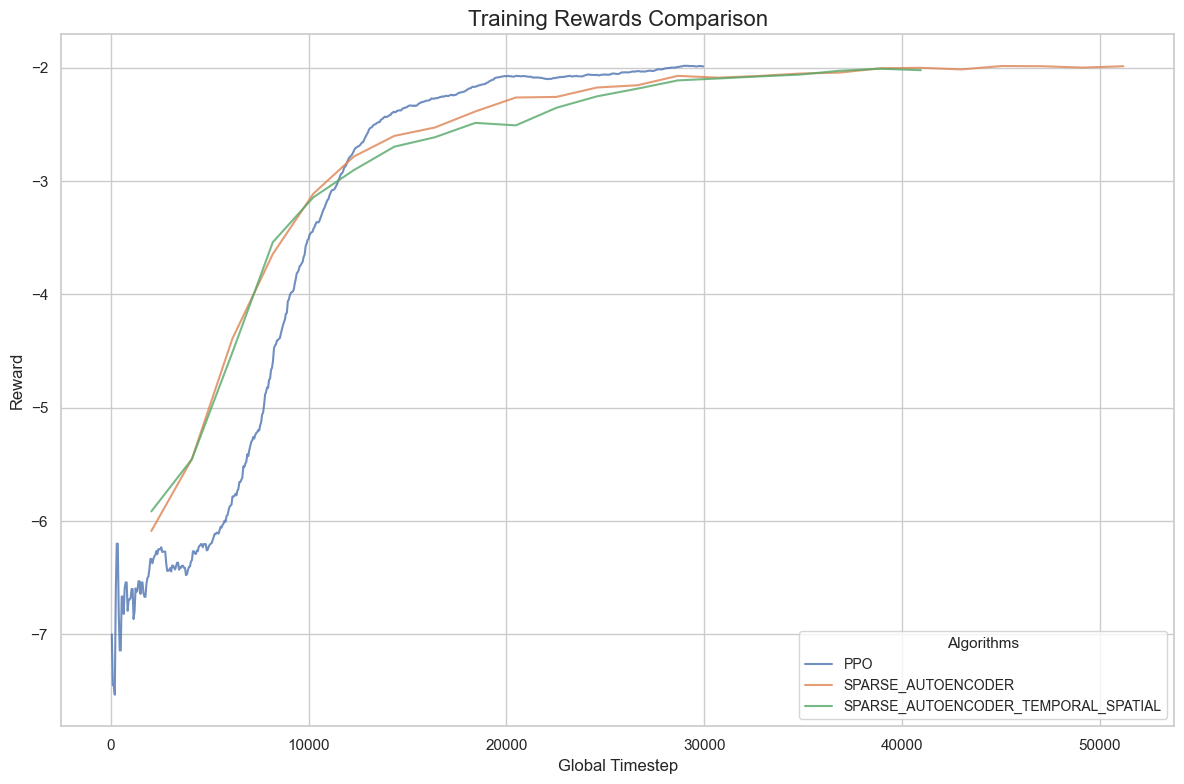

In [24]:
algorithms = ["ppo", "sparse_autoencoder", "sparse_autoencoder_temporal_spatial"]
plot_history(algorithms)

In [25]:
plot_history_plotly(algorithms)